### 2012년 연방선관위 DB
- 기부자의 이름, 직업, 고용형태, 주소, 기부금액이 포함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')

C:\Users\이찬솔\AppData\Local\Temp\ipykernel_13856\1148656186.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')


In [3]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [4]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


### 
#### 정당 가입 여부에 대한 데이터 추가
- 모든 정당의 후보 목록

In [6]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [8]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

- **```.map()```을 통하여, 후보 이름으로부터 정당 배열을 계산**
- party 열로 추가

In [13]:
fec['party'] = fec.cand_nm.map(parties)

In [14]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

#### 
- **분석을 단순화하기 위해 기부금액이 양수인 데이터만 필터링**

In [16]:
fec = fec[fec.contb_receipt_amt > 0]

- **버락 오바마와 미트 롬니가 양대 후보이므로, 이 두 후보의 기부금액 정보만 따로 추출**

In [ ]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### 
### 직업 및 고용주에 따른 기부 통계

In [21]:
fec.contbr_occupation.value_counts().head(15)

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
Name: contbr_occupation, dtype: int64

- **같은 직업 유형이지만, 다른 이름으로 표시된 직업들 존재 => 수정**

In [27]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# mapping이 없다면 x를 반환하는 함수
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [26]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

#### pivot_table을 통해 정당과 직업별 데이터 집계
- 최소 2백만불 이상 기부한 직업만 필터링

In [28]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index = 'contbr_occupation',
                                columns = 'party', 
                                aggfunc = 'sum')

In [29]:
by_occupation.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [33]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm.head()

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09


### 막대그래프 시각화
- 정당별 최다 기부자들의 직업

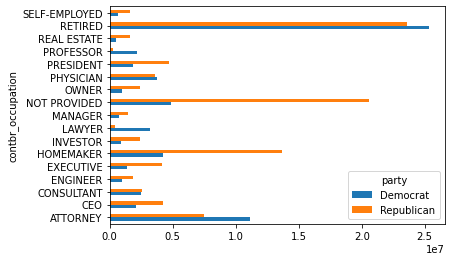

In [34]:
over_2mm.plot(kind = 'barh')
plt.show()

### 
### 오바마 후보와 롬니 후보별 가장 많은 금액을 기부한 직군 탐색

In [35]:
def get_top_amounts(group, key, n = 5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [38]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [39]:
grouped = fec_mrbo.groupby('cand_nm')

In [41]:
grouped.apply(get_top_amounts, 'contbr_occupation', n = 7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [42]:
grouped.apply(get_top_amounts, 'contbr_employer', n = 10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT EMPLOYED           8586308.70
               NOT PROVIDED           5053480.37
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12059527.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

### 
### 기부금액
- **기부 규모별로 버킷을 만들어 기부자 수를 분할**

In [45]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
bins

array([       0,        1,       10,      100,     1000,    10000,
         100000,  1000000, 10000000])

In [44]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels.head()

411      (10, 100]
412    (100, 1000]
413    (100, 1000]
414      (10, 100]
415      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

- **데이터를 이름과 버킷 이름으로 그룹지어 기부금액 규모에 따른 히스토그램 생성**

In [46]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [58]:
grouped.size().unstack().T

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


- 오바마는 롬니보다 적은 금액의 기부를 많이 받음
#### 


#### 기부금액을 모두 더한 후 버킷별로 정규화

In [63]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00
"(1000000, 10000000]",7148839.76,0.00


In [67]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis = 'columns'), axis = 'index')
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


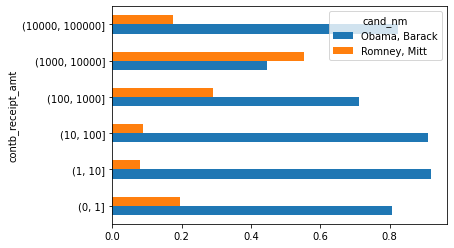

In [53]:
normed_sums[:-2].plot(kind = 'barh')
plt.show()

### 
### 주별 기부 통계

In [73]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [78]:
totals = grouped.contb_receipt_amt.sum().unstack().T.fillna(0)

In [87]:
totals = totals[totals.sum('columns') > 100000]
totals.head()

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60


In [89]:
percent = totals.div(totals.sum('columns'), axis = 'index')
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
